# Code for creating plots for Figs. 2 and S13

Run the notebook sequentially cell by cell

In [3]:
from matplotlib import pyplot as plt
import os
import numpy as np
from scipy.signal import convolve
import matplotlib as mpl

In [4]:
currdir=os.getcwd()

### This part processes velocity fields obtained using the python script 'python_scripts/velocity_profiles_v2.py' using raw data from  "/mnt/dioscuri-nas/Witek/20220225/1 min bright field". The raw data is not provided here due to a very large size (hundreds of GBs).

In [5]:
alldata=[] # this will be populated with data (velocity fields, image snapshots) for different wells
with open(currdir+"\\data_Fig_2\\velocity_profiles_BR_1s.npb", 'rb') as f:
    for i in range(0,100):
        try:
            coords=np.load(f)
            data=np.load(f)
            snapshot=np.load(f)
            snapshot=0.5+0.5*snapshot/np.max(snapshot)
            alldata.append((coords,data,snapshot))
            print(i,": ",coords)
        except ValueError:
            print("end of file")
            break

0 :  [  0 152 202 739 745]
1 :  [   1 1107  171 1691  711]
2 :  [   0 1150  190 1729  743]
3 :  [  0 240 114 795 675]
4 :  [   1 1193   87 1757  651]
5 :  [  0 222 114 797 677]
6 :  [  0 234 118 797 671]
7 :  [  0 204 122 765 675]
8 :  [   1 1163   91 1713  647]
9 :  [  0 216 160 803 707]
10 :  [  0 208 120 771 675]
11 :  [  0 142 120 703 675]
12 :  [   1 1095   89 1655  647]
13 :  [  0 284 124 835 669]
14 :  [  0 216 130 763 679]
15 :  [  0 195 156 769 715]
16 :  [  0 256 182 849 727]
17 :  [  0 262 188 845 737]
18 :  [  0 230 206 807 747]
19 :  [   1 1175  179 1759  715]
20 :  [  0 206 164 781 729]
21 :  [  0 216 188 783 745]
22 :  [   1 1167  161 1743  723]
23 :  [  0 184 226 773 771]
24 :  [  0 176 224 759 775]
25 :  [   1 1125  199 1705  741]
26 :  [  0 192 115 779 669]
27 :  [   1 1141   85 1719  655]
28 :  [  0 142 146 717 687]
29 :  [   1 1093  111 1673  665]
30 :  [   0 1194  390 1783  939]
31 :  [   0 1160  356 1733  901]
32 :  [   0  272  466  847 1019]
33 :  [   1 1223  429

## Fig. 2A

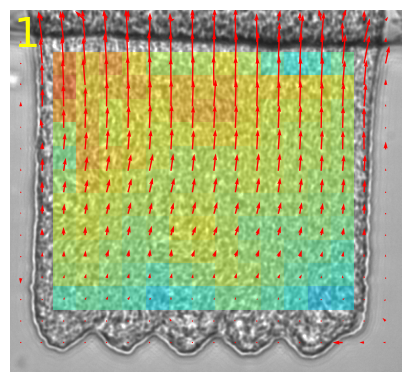

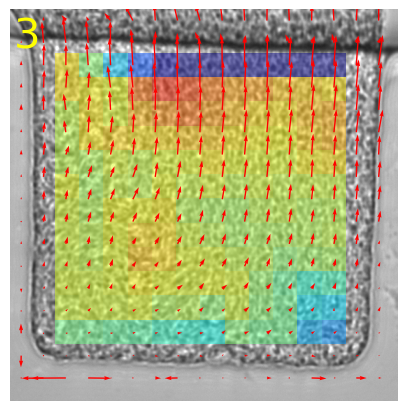

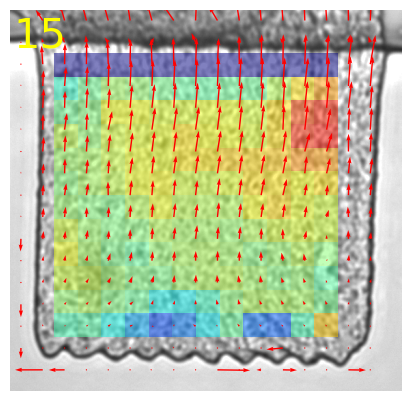

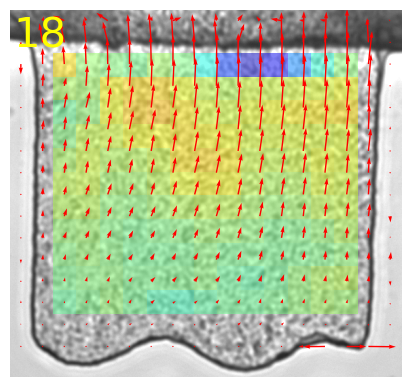

In [17]:
# this code plots the velocity field and the growth rate field for four selected wells
# we flip all images vertically so that "bottom" is always at the bottom of the image
n=len(alldata)
mm=4
for i in [1,3,15,18]:
    fig = plt.figure(figsize=(4,4),constrained_layout=True)
    ax = fig.subplots()
    fig.patch.set_facecolor('w')
    coords,data,snapshot=alldata[i]
        
    h,w=coords[4]-coords[2],coords[3]-coords[1]
    ax.imshow(np.flip(snapshot,axis=0), 'gray', extent=[0, w, 0, h],vmin=0.5,vmax=0.9)
    _,_,vx,vy=data[0],data[1],data[2],data[3]
    dx=32 # size of the box of pixels over which we average to get the velocity vector
    ny,nx=vx.shape
    x,y = np.meshgrid(np.linspace(dx/2.,dx/2.+dx*(nx-1),nx),np.linspace(dx/2.+dx*(ny-1),dx/2.,ny))

    
    # this calculates the growth rate as the divergence of the velocity field
    # compared to the formula in the paper, the signs of vx' and vy' are different here due to the way how x,y are ordered :
    grrate=np.apply_along_axis(lambda x: np.convolve(x, [1/2.,0,-1/2.], mode='same'), 1, vx) - np.apply_along_axis(lambda x: np.convolve(x, [1/2.,0,-1/2.], mode='same'), 0, vy)
    grrate=grrate/(dx*2)
    
    # avere over a 3x3 field to smooth out fluctuactions
    grrate=convolve(grrate,np.array([[1,1,1],[1,1,1],[1,1,1]])/9.,mode="same")
    
    gr1=0.0 # minimum growth rate for the colour map plot
    gr2=0.6 # maximum growth rate for the colour map plot
    ax.imshow(np.flip(grrate[2:-3,2:-3],axis=0),extent=[2*dx, (nx-2)*dx, h-(ny-2)*dx, h-2*dx],vmin=gr1,vmax=gr2,alpha=0.5,cmap=plt.cm.jet) 
    ax.quiver(x,h-y,vx,-vy, color='red')
    ax.text(5,h-55,str(i),fontsize=30,color='yellow')
    ax.axis('off')
    plt.savefig(currdir+'\\data_Fig_2\\vel_field'+str(i)+".png",dpi=600)
    plt.show()

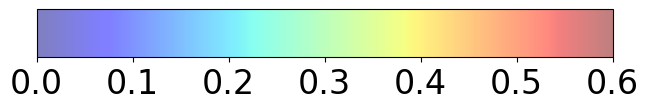

In [6]:
plt.rcParams['font.size'] = '24'
fig = plt.figure()
ax = fig.add_axes([0.05, 0.80, 0.9, 0.1])
cb = mpl.colorbar.ColorbarBase(ax, orientation='horizontal', 
                               cmap=plt.cm.jet, norm=mpl.colors.Normalize(0, 0.6),alpha=0.5)
plt.rcParams['font.size'] = '12'

## Fig. 2B

nsam= 99
10   10


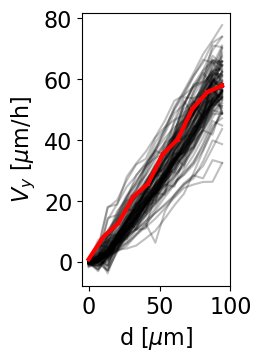

In [6]:
pixelsize=0.21 # micrometers/pixel
params = {'font.size': 16}
plt.rcParams.update(params)
fig = plt.figure(figsize=(2.5,3.5),constrained_layout=True)
ax = fig.subplots()
fig.patch.set_facecolor('w')
    
# a helper function for plotting averaged data
def plot_av_binned_xy(data,qx=1,binsize=1):
    # data must be in the form of a list of (x,y) lists of coordinates
    # x,y can have different length for different lists
    nsam=len(data)
    print("nsam=",nsam)
    x1=np.min([d[0] for d in data])
    x2=np.max([d[0] for d in data])
    nx=int((x2-x1)/binsize)
    xx=np.linspace(x1,x2,nx+1)
    yy=np.full((nx+1),0.) 
    yy2=np.full((nx+1),0.) 
    nn=np.full((nx+1),0) 
    for d in data:
        x,y=d
        inds=np.array(nx*(np.array(x)-x1)/(x2-x1),dtype=int)
        yy[inds]+=y
        yy2[inds]+=y*y
        nn[inds]+=1
        #print(inds)
    yy=yy/(nn+1e-12)
    yy2=yy2/(nn+1e-12)
    yy=yy[nn>0]
    yy2=yy2[nn>0]
    xx=xx[nn>0]
    nn=nn[nn>0]
    yy2=np.sqrt((yy2-yy*yy)/nn)
    print(len(xx)," ",len(yy))
    plt.errorbar(xx*qx,yy,yy2,linewidth=3,color='red')

# here we make the actual plot:
xys=[]
for i in [3,4,5,6,7,8,10,11,13,14,20]:  # we select only flat-bottom wells 
    coords,data,snapshot=alldata[i]
    _,_,vx,vy=data[0],data[1],data[2],data[3]
    dx=32
    ny,nx=vx.shape
    x,y = np.meshgrid(np.linspace(dx/2.,dx/2.+dx*(nx-1),nx),np.linspace(dx/2.+dx*(ny-1),dx/2.,ny))

    for j in range(4,len(vy[0])-4):
        xx=(y[0,0]-y[:,0])*pixelsize
        yy=-vy[:,j]*pixelsize
        yy=yy[xx<100]
        xx=xx[xx<100]
        plt.plot(xx,yy,c='black',alpha=0.25)
        xys.append((xx,yy))
plot_av_binned_xy(xys,qx=1,binsize=10)
plt.xlabel("d [$\mu$m]")
ax.set_xticks([0,50,100])
plt.ylabel("$V_y$ [$\mu$m/h]")
plt.savefig(currdir+"\\data_Fig_2\\vy_vs_distance.svg",format='svg')
plt.show()

## Fig. 2C

nsam= 99
9   9


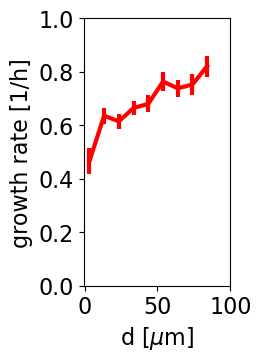

In [7]:
fig = plt.figure(figsize=(2.5,3.5),constrained_layout=True)
ax = fig.subplots()
fig.patch.set_facecolor('w')

# this will calculate and plot the average growth rate vs distance from the bottom:
xys=[]
for i in [3,4,5,6,7,8,10,11,13,14,20]:  # only flat-bottom wells 
    coords,data,snapshot=alldata[i]
    _,_,vx,vy=data[0],data[1],data[2],data[3]
    dx=32
    ny,nx=vx.shape
    x,y = np.meshgrid(np.linspace(dx/2.,dx/2.+dx*(nx-1),nx),np.linspace(dx/2.+dx*(ny-1),dx/2.,ny))

    for j in range(4,len(vy[0])-4): # take only x coordinates far enough from the walls so that the velocity field is not affected by artefacts
        xx=(y[0,0]-y[:,0])*pixelsize
        yy=-vy[:,j]*pixelsize
        yy=np.diff(yy)/np.diff(xx)  #  this calculates the derivative of vy --> growth rate
        xx=0.5*(xx[0:-1]+xx[1:])
        yy=yy[xx<90]
        xx=xx[xx<90]
        xys.append((xx,yy))
plot_av_binned_xy(xys,qx=1,binsize=10)
plt.xlabel("d [$\mu$m]")
ax.set_xticks([0,50,100])
plt.ylabel("growth rate [1/h]")
plt.ylim(0,1)
plt.savefig(currdir+"\\data_Fig_2\\gr_vs_distance.svg",format='svg')
plt.show()

### higher-resolution data is necessary to look at the horizontal component of the velocity field:

In [8]:
alldata=[]
with open(currdir+"\\data_Fig_2\\velocity_profiles_BR_1s_b16.npb", 'rb') as f:
    for i in range(0,100):
        try:
            coords=np.load(f)
            data=np.load(f)
            snapshot=np.load(f)
            snapshot=0.5+0.5*snapshot/np.max(snapshot)
            alldata.append((coords,data,snapshot))
            print(i,": ",coords)
        except ValueError:
            print("end of file")
            break

0 :  [  0 152 202 739 745]
1 :  [   1 1107  171 1691  711]
2 :  [   0 1150  190 1729  743]
3 :  [  0 240 114 795 675]
4 :  [   1 1193   87 1757  651]
5 :  [  0 222 114 797 677]
6 :  [  0 234 118 797 671]
7 :  [  0 204 122 765 675]
8 :  [   1 1163   91 1713  647]
9 :  [  0 216 160 803 707]
10 :  [  0 208 120 771 675]
11 :  [  0 142 120 703 675]
12 :  [   1 1095   89 1655  647]
13 :  [  0 284 124 835 669]
14 :  [  0 216 130 763 679]
15 :  [  0 195 156 769 715]
16 :  [  0 256 182 849 727]
17 :  [  0 262 188 845 737]
18 :  [  0 230 206 807 747]
19 :  [   1 1175  179 1759  715]
20 :  [  0 206 164 781 729]
21 :  [  0 216 188 783 745]
22 :  [   1 1167  161 1743  723]
23 :  [  0 184 226 773 771]
24 :  [  0 176 224 759 775]
25 :  [   1 1125  199 1705  741]
26 :  [  0 192 115 779 669]
27 :  [   1 1141   85 1719  655]
28 :  [  0 142 146 717 687]
29 :  [   1 1093  111 1673  665]
30 :  [   0 1194  390 1783  939]
31 :  [   0 1160  356 1733  901]
32 :  [   0  272  466  847 1019]
33 :  [   1 1223  429

## Fig. 2D

In [10]:
# prepare the data
xys=[]
for i in [3,4,5,6,7,8,10,11,12,13,14,20]:  # only flat-bottom wells 
    coords,data,snapshot=alldata[i]
    _,_,vx,vy=data[0],data[1],data[2],data[3]
    dx=16
    ny,nx=vx.shape
    y = np.linspace(dx/2.+dx*(ny-1),dx/2.,ny)
    vv=np.sqrt(vx**2 + vy**2)
    vx=vx/vv
    vy=vy/vv    
    for j in range(2,len(vy[0])-2):
        xx=(y[0]-y[:])*pixelsize
        yy=np.abs(vx[:,j]*pixelsize)
        yy=yy[xx<100]
        xx=xx[xx<100]
        xys.append((xx,yy))

nsam= 368
20   20


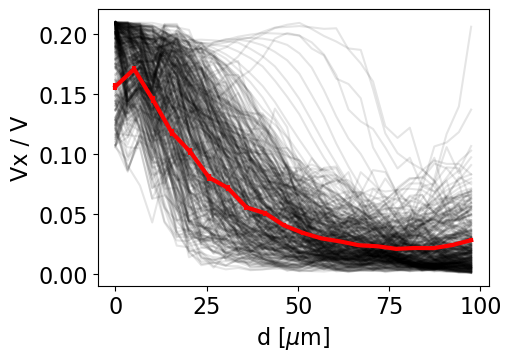

In [11]:
plt.rcParams['font.size'] = '16'
fig = plt.figure(figsize=(5,3.5),constrained_layout=True)
ax = fig.subplots()
fig.patch.set_facecolor('w')

def moving_average(data,n):
    return np.array([np.mean(data[max(0,i-n//2):min(len(data)-1,i+n//2)]) for i in range(0,len(data))])

def plot_av_binned_xy(data,qx=1,binsize=5):
    # data must be in the form of a list of (x,y) lists of coordinates
    # x,y can have different length for different lists
    nsam=len(data)
    print("nsam=",nsam)
    x1=np.min([d[0][0] for d in data])
    x2=np.max([d[0][-1] for d in data])
    nx=int((x2-x1)/binsize)
    xx=np.linspace(x1,x2,nx+1)
    yy=np.full((nx+1),0.) 
    yy2=np.full((nx+1),0.) 
    nn=np.full((nx+1),0) 
    for d in data:
        x,y=d
        inds=np.array(nx*(np.array(x)-x1)/(x2-x1),dtype=int)
        yy[inds]+=y
        yy2[inds]+=y*y
        nn[inds]+=1
    yy=yy/(nn+1e-12)
    yy2=yy2/(nn+1e-12)
    yy=yy[nn>0]
    yy2=yy2[nn>0]
    xx=xx[nn>0]
    nn=nn[nn>0]
    yy2=np.sqrt((yy2-yy*yy)/nn)
    print(len(xx)," ",len(yy))
    plt.errorbar(xx*qx,yy,yy2,linewidth=3,color='red')

for xy in xys:
    xx,yy=xy
    plt.plot(xx,moving_average(yy,5),color='black',alpha=0.1)
plot_av_binned_xy(xys)
plt.xlabel("d [$\mu$m]")
plt.ylabel("Vx / V")
plt.savefig(currdir+"\\data_Fig_2\\vx_vs_distance.svg",format='svg')
plt.show()

## Fig. 2E

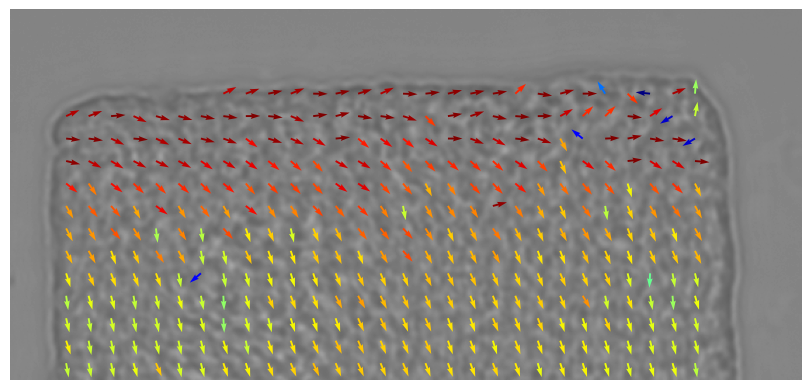

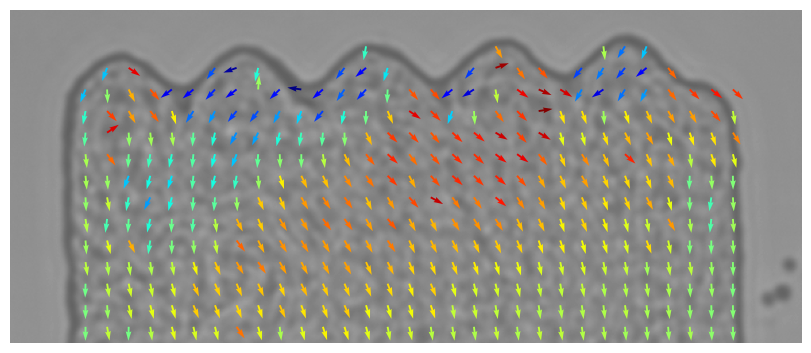

In [9]:
# this function eliminates the vectors that lie outside the well when plotting the velocity field
# as such vectors would show just noise (nothing moves outside the well)
def eliminate_outside(p, x0,y0,vx0,vy0):
    h,w=x0.shape
    selr,selc=[],[]
    for i in range(0,h):
        for j in range(0,w):
            if (p==4 and x0[i][j]>30 and x0[i][j]<500 and y0[i][j]<500+j/2):
                selr.append(i)
                selc.append(j)
            elif (p==9 and x0[i][j]>40 and x0[i][j]<550 and y0[i][j]<500+j/2-15*np.sin(1.07*j) and (x0[i][j]<500 or y0[i][j]<500)):
                selr.append(i)
                selc.append(j)
                
    return x0[selr,selc],y0[selr,selc],vx0[selr,selc],vy0[selr,selc]

# plot the velocity field for two selected wells:
for i in [4,9]:
    fig = plt.figure(figsize=(8,4),constrained_layout=True)
    coords,data,snapshot=alldata[i]
    h,w=coords[4]-coords[2],coords[3]-coords[1]
    plt.imshow(snapshot, 'gray', extent=[0, w, 0, h],vmin=0.0,vmax=1.5)
    _,_,vx,vy=data[0],data[1],data[2],data[3]
    dx=16
    ny,nx=vx.shape
    x,y = np.meshgrid(np.linspace(dx/2.,dx/2.+dx*(nx-1),nx),np.linspace(dx/2.+dx*(ny-1),dx/2.,ny))

    vv=np.sqrt(vx**2 + vy**2)
    vx=vx/vv
    vy=vy/vv
    dirs=np.arctan2(vx,vy)
    plt.ylim(bottom=300)
    
    x,y,vx,vy=eliminate_outside(i,x,y,vx,vy)
    plt.quiver(x,y,vx,vy,vx, cmap=plt.cm.jet)
    plt.axis('off')
    plt.savefig(currdir+'\\data_Fig_2\\vel_field_hires_'+str(i)+".png",dpi=600)
    plt.show()

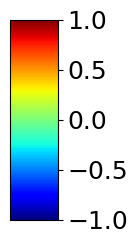

In [10]:
# this plots the color scale bar
plt.rcParams['font.size'] = '18'
fig = plt.figure()
ax = fig.add_axes([0.0, 0.10, 0.06, 0.5])
cb = mpl.colorbar.ColorbarBase(ax, orientation='vertical', 
                               cmap=plt.cm.jet, norm=mpl.colors.Normalize(-1, 1))
plt.rcParams['font.size'] = '12'

## Fig S13
### The plot shows how much the wells moved during acquisition by tracking small bright or dark dots in the PDMS

In [12]:
# this imports trajectories of the dots, generated using the script "python_scripts/subdiffraction_movement.py"
trajs=[]
def import_trajs(name,dp=0):
    global trajs
    with open(name, 'rb') as f:
        for i in range(0,100):
            try:
                coords=np.load(f)
                coords[0]+=dp
                data=np.load(f)
                snapshot=np.load(f)
                snapshot=0.5+0.5*snapshot/np.max(snapshot)
                trajs.append((coords,data,snapshot))
            except ValueError:
                break
import_trajs(currdir+"\\data_Fig_2\\output_vel2-5.npb")
import_trajs(currdir+"\\data_Fig_2\\output_vel6-9.npb",dp=4)

In [13]:
def get_velxy_from_traj(traj): # velocities in um/h
    n=len(traj)
    tt=np.linspace(0,(n-1)/3600.,n)
    fitx=np.polyfit(tt,traj[:,0],1)
    fity=np.polyfit(tt,traj[:,1],1)
    return [fitx[0],fity[0]]

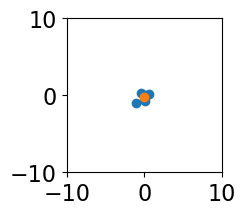

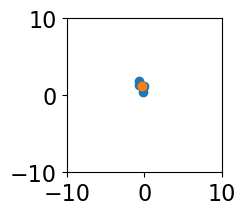

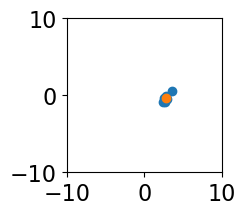

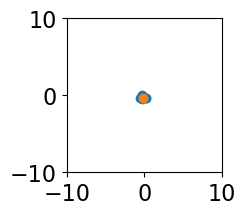

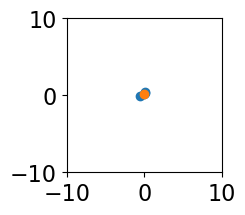

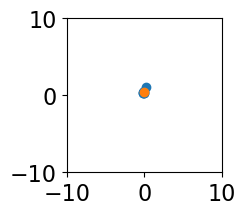

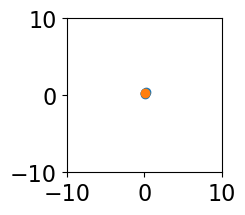

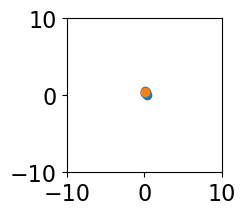

In [14]:
# velocities for different FOVs
plt.rcParams["figure.figsize"] = (2,2)
cmxys=[]
for pi in range(0,8):
    velsxy=np.array([get_velxy_from_traj(trajs[i][1]) for i in range(0,len(trajs)) if trajs[i][0][0]==pi])
    plt.scatter(velsxy[:,0],velsxy[:,1])
    cmxy=np.mean([vxy for vxy in velsxy if (abs(vxy[0]**2+vxy[1]**2)<25**2)],axis=0)
    plt.scatter([cmxy[0]],[cmxy[1]])
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    cmxys.append(cmxy)
    plt.show()
cmxys=np.array(cmxys)

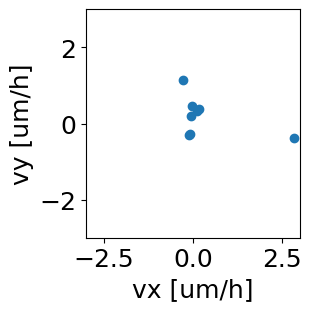

<Figure size 200x200 with 0 Axes>

In [15]:
# this plots only the average velocity for each field of view
plt.rcParams['font.size'] = '18'
fig = plt.figure(figsize=(3,3),constrained_layout=True)
ax = fig.subplots()
fig.patch.set_facecolor('w')
plt.figure(facecolor='w')
ax.scatter(cmxys[:,0],cmxys[:,1])
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_xlabel('vx [um/h]')
ax.set_ylabel('vy [um/h]')
fig.savefig(currdir+"\\data_Fig_2\\image_registration.png")
plt.show()
plt.rcParams['font.size'] = '12'